<a href="https://colab.research.google.com/github/k2h2j3/My-First-AI/blob/master/testcatdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from matplotlib.cbook import flatten

import numpy as np
import tensorflow as tf


In [25]:
#데이터 셋
train_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/train'
test_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test'
validation_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation'

train_dogs_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/train/dogs'
train_cats_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/train/cats'

test_dogs_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test/dogs'
test_cats_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test/cats'

validation_dogs_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation/dogs'
validation_cats_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation/cats'

In [26]:
#스케일링
train_gen = ImageDataGenerator( rescale = 1./255)
val_gen = ImageDataGenerator( rescale = 1./255)
test_gen = ImageDataGenerator( rescale = 1./255)

In [27]:
# flow_from_directory: 폴더에서 이미지 가져오기
# 폴더명, 이미지 크기, 한번에 변환 할 이미지 수, 라벨링 모드
# 이진분류 = binary, 다중 분류 = categorical 
# 라벨 번호는 0부터 시작(cat은 0, dog는 1)
train_generator = train_gen.flow_from_directory(train_dir,
                              target_size =(64,64),
                              batch_size=32,
                              class_mode = 'binary')
val_generator = val_gen.flow_from_directory( validation_dir,
                            target_size = (64,64),
                            batch_size=32,
                            class_mode =  'binary')
test_generator = test_gen.flow_from_directory( test_dir,
                            target_size = (64,64),
                            batch_size=32,
                            class_mode =  'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [28]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)


In [29]:
from matplotlib.cbook import flatten
c_model = Sequential()

# 입력층(CNN)
# 특징을 도드라지게 해준다
c_model.add(Conv2D(filters = 32, # 사진에서 찾을 특성 개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (64,64,3), # 입력 데이터의 크기
                   padding = 'same', # 가장 자리를 0으로 채움 
                  # same : 입력데이터의 크기와 동일하게 맞춰준다
                   activation = 'relu'))
#불필요한 부분 삭제
c_model.add(MaxPooling2D(pool_size = (2,2),strides=2))

c_model.add(Conv2D(filters = 32, # 사진에서 찾을 특성 개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (64,64,3), # 입력 데이터의 크기
                   padding = 'same', # 가장 자리를 0으로 채움(입력이미지크기=출력이미지크기)
                  # same : 입력데이터의 크기와 동일하게 맞춰준다
                   activation = 'relu'))

c_model.add(MaxPooling2D(pool_size = (2,2),strides=2))

# 1차원으로 데이터 축소
c_model.add(Flatten())

#은닉층
c_model.add(Dense(units=128, activation = 'relu'))

#출력층
c_model.add(Dense(units=1, activation= 'sigmoid'))

c_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 8192)              0         
                                                                 
 dense_30 (Dense)            (None, 128)             

In [31]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
c_model.compile(loss='binary_crossentropy',
                optimizer = adam,
                metrics=['accuracy'])
c_histroy = c_model.fit_generator(generator=train_generator,
            steps_per_epoch=50,
            epochs=20,
            validation_data = val_generator,
            validation_steps = 2)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


50/50 [==============================] - 25s 496ms/step - loss: 0.6677 - accuracy: 0.5770 - val_loss: 0.6892 - val_accuracy: 0.5312
Epoch 2/20
50/50 [==============================] - 24s 474ms/step - loss: 0.6175 - accuracy: 0.6566 - val_loss: 0.6573 - val_accuracy: 0.6562
Epoch 3/20
50/50 [==============================] - 23s 469ms/step - loss: 0.5656 - accuracy: 0.7197 - val_loss: 0.6841 - val_accuracy: 0.6250
Epoch 4/20
50/50 [==============================] - 20s 395ms/step - loss: 0.4947 - accuracy: 0.7513 - val_loss: 0.6938 - val_accuracy: 0.6094
Epoch 5/20
50/50 [==============================] - 22s 437ms/step - loss: 0.4565 - accuracy: 0.7936 - val_loss: 0.6451 - val_accuracy: 0.6250
Epoch 6/20
50/50 [==============================] - 20s 401ms/step - loss: 0.3968 - accuracy: 0.8207 - val_loss: 0.6399 - val_accuracy: 0.7031
Epoch 7/20
50/50 [==============================] - 20s 407ms/step - loss: 0.3923 - accuracy: 0.8302 - val_loss: 0.7174 - val_accuracy: 0.7031
Epoch 8/20

[]

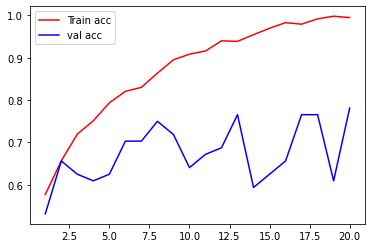

In [32]:
import matplotlib.pyplot as plt
acc = c_histroy.history['accuracy']
val_acc = c_histroy.history['val_accuracy']

epoch = range(1, len(acc)+1) #정확도의 개수

plt.plot(epoch, acc, c='red', label = 'Train acc') # 훈련 데이터 정확도
plt.plot(epoch, val_acc, c= 'blue', label = 'val acc') # 검증 데이터 정확도
plt.legend() #범례
plt.plot() 